In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from torch.utils.data import DataLoader
from data.datasets.golden_panels import GoldenPanelsDataset
from networks.ssupervae_contextual_attentional import SSuperVAEContextualAttentional
from utils.config_utils import read_config, Config
from torchvision import transforms
from utils.image_utils import *

In [3]:
ptu.set_gpu_mode(True)
config = read_config(Config.PLAIN_SSUPERVAE)
golden_age_config = read_config(Config.GOLDEN_AGE)

panel_dim = golden_age_config.panel_dim[0]

cont_epoch = -1
cont_model = None  # "playground/ssupervae/weights/model-18.pth"
limit_size = 32

# data = RandomDataset((3, 3, 360, 360), (3, config.image_dim, config.image_dim))
data = GoldenPanelsDataset(golden_age_config.panel_path,
                           golden_age_config.sequence_path,
                           golden_age_config.panel_dim,
                           config.image_dim,
                           augment=False,
                           mask_val=golden_age_config.mask_val,
                           mask_all=golden_age_config.mask_all,
                           return_mask=golden_age_config.return_mask,
                           return_mask_coordinates=golden_age_config.return_mask_coordinates,
                           train_test_ratio=golden_age_config.train_test_ratio,
                           train_mode=True,
                           limit_size=limit_size)
data_loader = DataLoader(data, batch_size=config.batch_size, shuffle=True, num_workers=4)
# creating model and training details
net = SSuperVAEContextualAttentional(config.backbone,
                                     panel_img_size=panel_dim,
                                     latent_dim=config.latent_dim,
                                     embed_dim=config.embed_dim,
                                     seq_size=config.seq_size,
                                     decoder_channels=config.decoder_channels,
                                     gen_img_size=config.image_dim).to(ptu.device)

dataiter = iter(data_loader)

Loaded pretrained weights for efficientnet-b5


In [4]:
batch = next(dataiter)

x, y, mask = batch[0].to(ptu.device), batch[1].to(ptu.device), batch[2].to(ptu.device)
mask_coordinates = ptu.get_numpy(batch[3])

_, _, interim_face_size, _ = y.shape
z, _, mu_z, mu_x, logstd_z = net(x)

x_stage_0, \
x_stage_1,\
x_stage_2,\
offset_flow,\
fine_faces,\
last_panel_gts= net.fine_generation_forward(x,
                                                y,
                                                mask,
                                                            mu_x,
                                                            mask_coordinates,
                                                            interim_face_size=interim_face_size)



/opt/anaconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


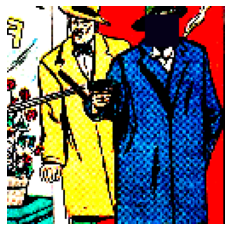

In [7]:
imshow(x_stage_2[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


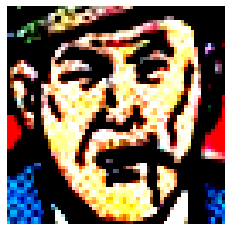

In [9]:
imshow(y[2])

In [20]:
x_stage_2[2].size()

torch.Size([3, 128, 128])

In [22]:
x = transforms.ToTensor()
pil_transform = transforms.ToPILImage()

In [23]:
y = pil_transform(x_stage_2[2])


In [25]:
y = x(y)

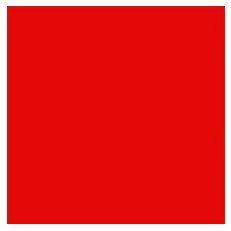

In [27]:
imshow(y)

In [29]:
ptu.get_numpy(x_stage_2[2])

array([[[-0.08113627, -0.08445653, -0.08699361, ..., -0.08762628,
         -0.0883527 , -0.09259737],
        [-0.08855035, -0.09901853, -0.10579196, ..., -0.10462236,
         -0.10674788, -0.10597973],
        [-0.09017301, -0.10266565, -0.11052159, ..., -0.10957965,
         -0.11098231, -0.10874271],
        ...,
        [-0.09067549, -0.10463645, -0.11367978, ..., -0.11347663,
         -0.11531594, -0.1115386 ],
        [-0.09481502, -0.10927287, -0.11660454, ..., -0.11665061,
         -0.11794578, -0.11081807],
        [-0.09780363, -0.11393388, -0.12006547, ..., -0.11983626,
         -0.11895211, -0.11009284]],

       [[ 0.05951599,  0.05717059,  0.05612223, ...,  0.05693953,
          0.05450691,  0.05546454],
        [ 0.04335316,  0.03944908,  0.03924439, ...,  0.04020318,
          0.03843958,  0.05081051],
        [ 0.04034276,  0.03722847,  0.03883504, ...,  0.03985739,
          0.03758464,  0.05339556],
        ...,
        [ 0.03998753,  0.03904499,  0.04136515, ...,  